# Preprocessing and EDA

Baca dataset dan lihat informasi dari dataset

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/surabaya-house-prices.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5300 entries, 0 to 5299
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            5262 non-null   float64
 1   num_bedroom      5300 non-null   int64  
 2   num_bathroom     5300 non-null   int64  
 3   garage_capacity  5300 non-null   int64  
 4   land_area        5300 non-null   int64  
 5   building_area    5300 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 248.6 KB


Hapus baris yg menandung nilai kosong, hapus juga baris yang mengandung jumlah kamar tidur dan kamar mandi yang bernilai 0, dan minimal luas tanah dan luas bangunan yaitu diatas 10

In [64]:
df.dropna(inplace=True)
df.drop(df[df["num_bedroom"] == 0].index, inplace=True)
df.drop(df[df["num_bathroom"] == 0].index, inplace=True)
df.drop(df[df["building_area"] <= 10].index, inplace=True)
df.drop(df[df["land_area"] <= 10].index, inplace=True)

Mengecek apakah ada luas tanah yg lebih kecil daripada luas bangunan

In [65]:
df[df["land_area"] < df["building_area"]]

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
1,1.800000e+09,4,3,1,119,199
2,3.250000e+09,4,2,2,210,300
4,3.980000e+09,15,15,1,136,233
5,1.370000e+10,5,6,2,330,600
6,3.300000e+09,4,3,0,140,200
...,...,...,...,...,...,...
5293,2.600000e+09,3,3,2,110,165
5295,3.800000e+09,4,3,2,200,254
5297,6.800000e+09,4,4,2,220,350
5298,8.870000e+08,3,2,0,84,90


Karena aneh jika terdapat luas tanah yang lebih kecil daripada luas bangunan, maka kita akan menghapusnya

In [66]:
df.drop(df[df["land_area"] < df["building_area"]].index, inplace=True)

Cek jika terdapat duplikat

In [67]:
df.duplicated().sum()

np.int64(327)

Hapus data yang duplikat

In [68]:
df.drop_duplicates(inplace=True)

Lihat nilai statistik datanya

In [69]:
df.describe()

,price,num_bedroom,num_bathroom,garage_capacity,land_area,building_area
count,1.668000e+03,1668.000000,1668.000000,1668.000000,1668.000000,1668.00000
mean,5.013411e+09,3.302758,2.244604,0.931655,278.568945,202.28717
std,9.705387e+09,1.677350,1.530377,1.235888,325.111352,223.28697
min,3.500000e+07,1.000000,1.000000,0.000000,24.000000,19.00000
25%,1.010000e+09,2.000000,1.000000,0.000000,100.000000,77.00000
50%,2.000000e+09,3.000000,2.000000,1.000000,180.000000,139.50000
75%,4.300000e+09,4.000000,3.000000,1.000000,332.000000,250.00000
max,1.100000e+11,24.000000,30.000000,16.000000,3852.000000,3490.00000


Korelasi antar fitur

<Axes: >

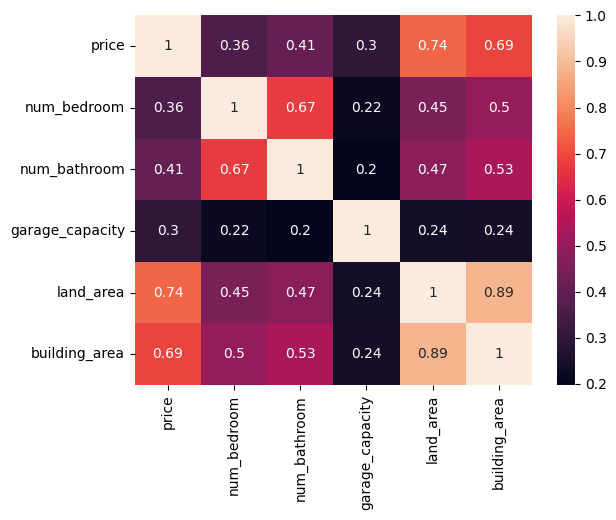

In [70]:
sns.heatmap(df.corr(), annot=True)

Menampilkan distribusi data dengan boxplot

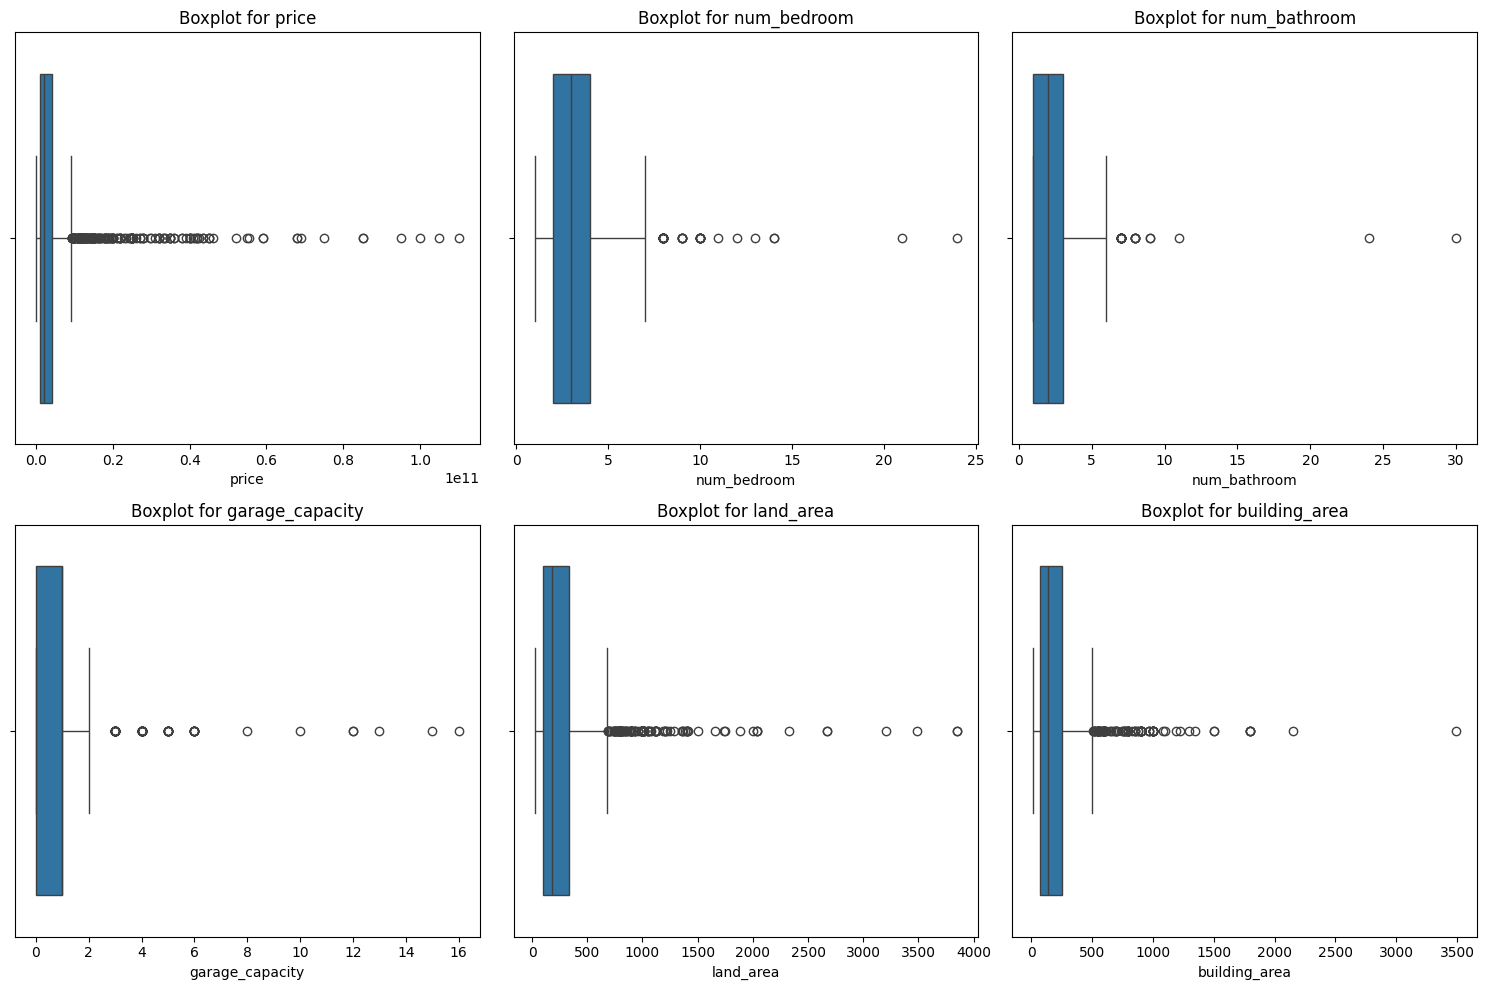

In [71]:
rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    if i < len(axes):
        sns.boxplot(x=df[col], ax=axes[i])
        axes[i].set_title(f"Boxplot for {col}")

for j in range(len(df.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

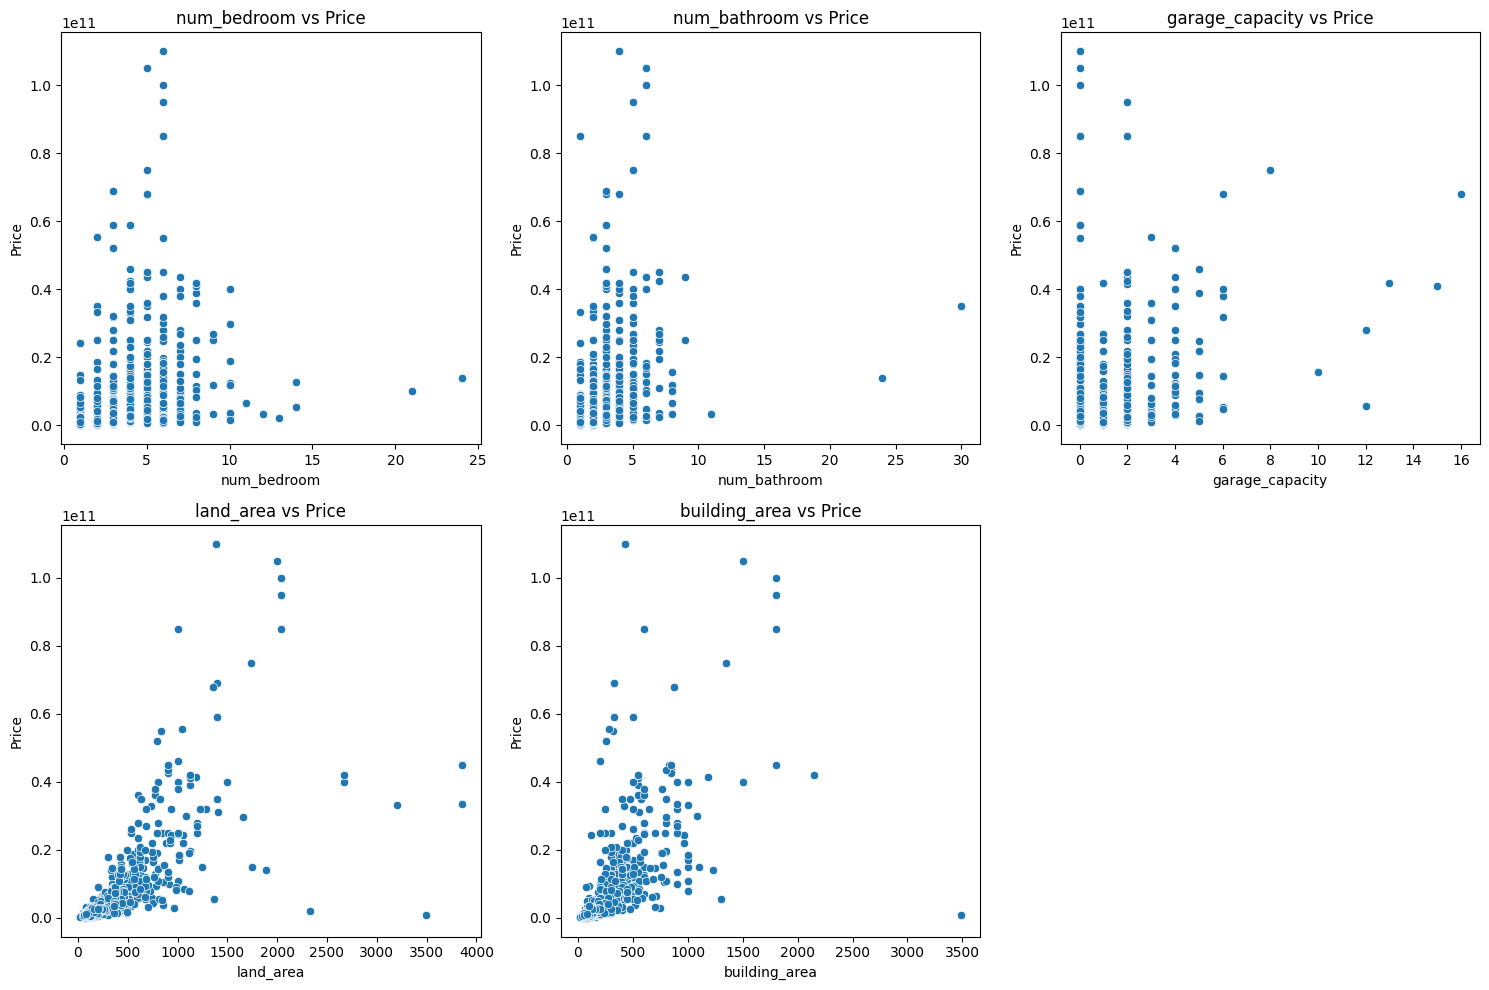

In [72]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(df.drop("price", axis=1).columns, start=1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[var], y=df["price"])
    plt.title(f"{var} vs Price")
    plt.xlabel(var)
    plt.ylabel("Price")
plt.tight_layout()
plt.show()

In [77]:
df.to_csv("data/surabaya-house-prices-cleaned.csv", index=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668 entries, 0 to 5296
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1668 non-null   float64
 1   num_bedroom      1668 non-null   int64  
 2   num_bathroom     1668 non-null   int64  
 3   garage_capacity  1668 non-null   int64  
 4   land_area        1668 non-null   int64  
 5   building_area    1668 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 91.2 KB


In [78]:
# Random forest default parameter
default_parameters = {
    "n_estimators": [100, 200, 300],
    "max_depth": [10, 20, None],  # max_depth : int, default=None
    "min_samples_split": [2, 5, 10],  # min_samples_split : int or float, default=2
    "min_samples_leaf": [1, 2, 4],  # min_samples_leaf : int or float, default=1
    "max_features": [
        "sqrt",
        "log2",
        None,
    ],  # max_features : {"sqrt", "log2", None}, int or float, default=1.0
    "bootstrap": [True, False],
}